# Data Wrangling Project: WeRateDogs

- Including relevant libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import datetime
import seaborn as sns
%matplotlib inline

## Gathering Data

#### <i> 1) importing twitter archive file</i></b>

In [164]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### <i> 2) using request library to get tweet image predictions file. </i>

In [165]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file=requests.get(url)
open('image_predictions.tsv', 'wb').write(file.content);

In [166]:
image_predictions=pd.read_csv('image_predictions.tsv',sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### <i>3) Retweet/Favourite count data using Twitter API </i>

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [167]:
tweets_data = []
tweet_file = open('tweet_json.txt', "r")
for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue        
tweet_file.close()

In [168]:
json_data=[]
for i in range(len(tweets_data)):        
    tweet_id = tweets_data[i]['id']
    retweet_count = tweets_data[i]['retweet_count']
    favorite_count = tweets_data[i]['favorite_count']                
    json_dict = {'tweet_id': tweet_id,'retweet_count': retweet_count, 'favorite_count': favorite_count}
    json_data.append(json_dict)

In [169]:
tweets_json=pd.DataFrame(json_data)
tweets_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7718,36246
1,892177421306343426,5704,31270
2,891815181378084864,3781,23543
3,891689557279858688,7878,39545
4,891327558926688256,8489,37744


## Assessing Data

In [170]:
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
tweets_json_clean=tweets_json.copy()

In [171]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [172]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [173]:
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [174]:
# No Duplicate values
print(twitter_archive_clean.duplicated().sum())
print(image_predictions_clean.duplicated().sum())
print(tweets_json_clean.duplicated().sum())

0
0
0


In [175]:
twitter_archive_clean.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Cannon       1
Edgar        1
space        1
Jim          1
Rose         1
Name: name, Length: 957, dtype: int64

In [176]:
twitter_archive_clean.query('name == "None" or name == "a" or name == "not"').index

Int64Index([   5,    7,   12,   24,   25,   30,   32,   35,   37,   41,
            ...
            2343, 2344, 2347, 2348, 2350, 2351, 2352, 2353, 2354, 2355],
           dtype='int64', length=802)

In [177]:
twitter_archive_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [178]:
(twitter_archive_clean.rating_numerator<10).sum()

440

In [179]:
twitter_archive_clean[twitter_archive_clean.text.str[0:4]=='RT @'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


## Assessing Results

### Quality

#### <i> Twitter Archive Table </i>

- Remove retweets rows.
- The values in numerator should be greater than values in denominator.
- Convert datatype of timestamp from object to DateTime.
- Convert timestamp to three columns days,months and year.
- Names which have dog name are starting with uppercase letter.
- Remove unnecessary columns (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id       ,in_reply_to_user_id,expanded_urls)

#### <i> Image Predictions Table </i>

- Column names of p1,p2,p3 should be prediction1, prediction2, prediction3.
- Need only the column with highest confidence interval remove columns related to p2 and p3.
- Some names are starting with lowercase character, make them consistent.
- Change names of other columns too related to prediction (i.e p1_conf, p1_dog ...)

### Tideness

- There should be only one dog stage column instead of 4 columns (doggo, floofer, pupper, puppo)
- Combine tables into only one dataframe.


## Tideness

#### Define

<i> There should be only one dog stage column instead of 4 columns (doggo, floofer, pupper, puppo) </i>

#### Code

In [180]:
twitter_archive_clean['dog_stage']=None
for i in range(len(twitter_archive_clean)):
    stage=''
    count=0
    if twitter_archive_clean['doggo'][i]=='doggo':
        stage='doggo'
        count+=1
    if twitter_archive_clean['floofer'][i]=='floofer':
        stage='floofer'
        count+=1
    if twitter_archive_clean['pupper'][i]=='pupper':
        stage='pupper'
        count+=1
    if twitter_archive_clean['puppo'][i]=='puppo':
        stage='puppo'
        count+=1
    if stage == '':
        stage=None
    if count>1:        
        stage='multiple_stages'
    twitter_archive_clean['dog_stage'][i]=stage

e:\python3.7.4\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [181]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True);

#### Test

In [182]:
twitter_archive_clean.dog_stage.value_counts()

pupper             245
doggo               83
puppo               29
multiple_stages     14
floofer              9
Name: dog_stage, dtype: int64

## Clean

#### Twitter Archive Table

#### Define

<i> Remove rows with retweets </i>

#### Code

In [183]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [184]:
twitter_archive_clean[twitter_archive_clean.text.str[0:4]=='RT @'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Define

<i> The values in numerator should be greater than values in denominator. </i>

#### Code

In [185]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['rating_denominator']>twitter_archive_clean['rating_numerator']].index,inplace=True)

#### Test

In [186]:
twitter_archive_clean[twitter_archive_clean['rating_denominator']>twitter_archive_clean['rating_numerator']].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Define

<i> Convert datatype of timestamp from object to DateTime </i>

#### Code

In [187]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp']);

#### Test

In [188]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1742 entries, 0 to 2350
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1742 non-null   int64              
 1   in_reply_to_status_id       65 non-null     float64            
 2   in_reply_to_user_id         65 non-null     float64            
 3   timestamp                   1742 non-null   datetime64[ns, UTC]
 4   source                      1742 non-null   object             
 5   text                        1742 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1695 non-null   object             
 10  rating_numerator            1742 non-null   int64           

#### Define

<i> Remove unnecessary columns (retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id       ,in_reply_to_user_id,expanded_urls) </i>

#### Code

In [189]:
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','expanded_urls'],axis=1,inplace=True)

#### Test

In [190]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None


#### Define

<i> Convert timestamp to three columns days,months and year and remove timestamp column. </i>

#### Code

In [191]:
twitter_archive_clean['year']=pd.DatetimeIndex(twitter_archive_clean['timestamp']).year

In [192]:
twitter_archive_clean['day']=pd.DatetimeIndex(twitter_archive_clean['timestamp']).day

In [193]:
twitter_archive_clean['month']=pd.DatetimeIndex(twitter_archive_clean['timestamp']).month

In [194]:
twitter_archive_clean.drop('timestamp',axis=1,inplace=True)

#### Test

In [195]:
twitter_archive_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,day,month
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,2017,1,8
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,2017,1,8
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,2017,31,7
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,2017,30,7
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,2017,29,7


#### Define

<i> The tweets in which the dog have no name are assigned, 'None', 'a' and 'not'. Assign "None" to all these tweets.

#### Code

In [196]:
twitter_archive_clean.loc[twitter_archive_clean[twitter_archive_clean.name.astype(str).str[0].str.islower()].index]="None"

#### Test

In [197]:
twitter_archive_clean.name.value_counts()

None       605
Charlie     11
Lucy        10
Cooper       9
Oliver       9
          ... 
Bayley       1
Timison      1
Walker       1
Dobby        1
Rose         1
Name: name, Length: 792, dtype: int64

In [198]:
twitter_archive_clean[twitter_archive_clean.name.astype(str).str[0].str.islower()]

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,day,month


#### Define

<i> Convert name of all dogs to lowerCase

#### Code

In [199]:
twitter_archive_clean.name = twitter_archive_clean.name.str.lower()

In [200]:
twitter_archive_clean.name.value_counts()

none       605
charlie     11
lucy        10
cooper       9
oliver       9
          ... 
crouton      1
beemo        1
pepper       1
aldrick      1
carly        1
Name: name, Length: 792, dtype: int64

#### Image Prediction Table

#### Define

<i> Column names of p1,p2,p3 should be prediction1, prediction2, prediction3. </i>

#### Code

In [201]:
image_predictions_clean.rename(columns={'p1':'Prediction1','p2':'Prediction2','p3':'Prediction3'},inplace=True)

#### Test

In [202]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'Prediction1',
 'p1_conf',
 'p1_dog',
 'Prediction2',
 'p2_conf',
 'p2_dog',
 'Prediction3',
 'p3_conf',
 'p3_dog']

#### Define

<i> Need only the column with highest confidence interval remove columns related to p2 and p3. </i>

#### Code

In [203]:
image_predictions_clean.drop(['Prediction2','p2_conf','p2_dog','Prediction3','p3_conf','p3_dog'],axis=1,inplace=True)

#### Test

In [204]:
list(image_predictions_clean)

['tweet_id', 'jpg_url', 'img_num', 'Prediction1', 'p1_conf', 'p1_dog']

#### Define

<i> Some names are starting with lowercase character, make them consistent. </i>

#### Code

In [205]:
image_predictions_clean.Prediction1=image_predictions_clean.Prediction1.str.lower()

#### Test

In [206]:
image_predictions_clean.Prediction1.value_counts()

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
                     ... 
limousine               1
washer                  1
basketball              1
killer_whale            1
pillow                  1
Name: Prediction1, Length: 378, dtype: int64

#### Define

<i> Change names of other columns too related to prediction (i.e p1_conf, p1_dog ...) </i>

#### Code

In [207]:
image_predictions_clean.rename(columns={'p1_conf':'Confidence','p1_dog':'Dog','Prediction1':'Prediction'},inplace=True)

#### Test

In [208]:
list(image_predictions_clean)

['tweet_id', 'jpg_url', 'img_num', 'Prediction', 'Confidence', 'Dog']

## Tideness

#### Define

<i> Combine tables into only one dataframe using joins. </i>

#### Code

In [209]:
df_final=twitter_archive_clean.merge(image_predictions_clean,left_on='tweet_id',right_on='tweet_id')

In [210]:
df_final=df_final.merge(tweets_json_clean,left_on='tweet_id',right_on='tweet_id')

#### Test

In [211]:
df_final.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage,year,day,month,jpg_url,img_num,Prediction,Confidence,Dog,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,phineas,None,2017,1,8,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,7718,36246
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,tilly,None,2017,1,8,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,5704,31270
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,archie,None,2017,31,7,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,3781,23543
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,darla,None,2017,30,7,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,7878,39545
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,franklin,None,2017,29,7,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,8489,37744


## Store

In [212]:
df_final.to_csv('twitter_archive_master.csv',index=False)

## Analysis

In [213]:
df=pd.read_csv('twitter_archive_master.csv')

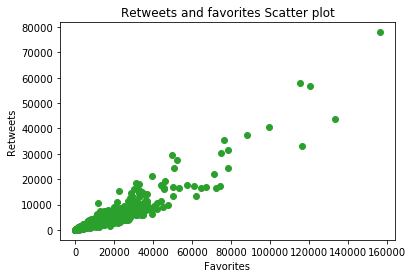

In [214]:
plt.scatter(df['favorite_count'], df['retweet_count'],color='C2');
plt.xlabel('Favorites');
plt.ylabel('Retweets');
plt.title('Retweets and favorites Scatter plot');

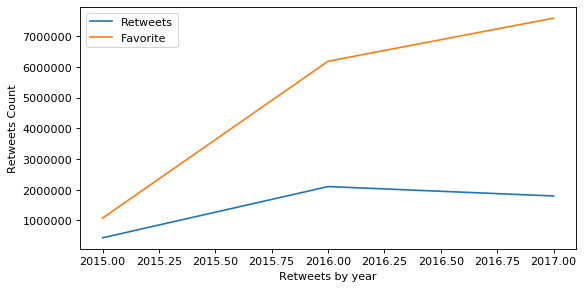

In [215]:
retweet_year = df.groupby('year')['retweet_count'].sum()
favorite_year = df.groupby('year')['favorite_count'].sum()
plt.figure(figsize=(8,4), dpi = 80)
plt.xlabel('Retweets by year')
plt.ylabel('Retweets Count')
plt.plot(retweet_year,label='Retweets')
plt.plot(favorite_year,label='Favorite')
plt.legend()
plt.show()

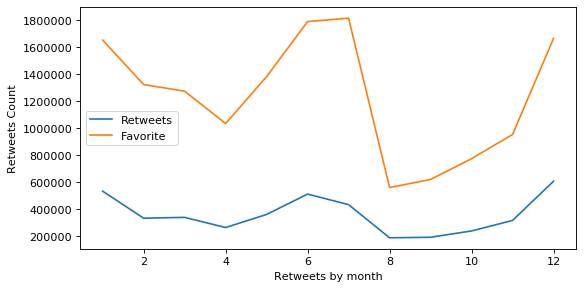

In [216]:
retweet_month = df.groupby('month')['retweet_count'].sum()
favorite_month = df.groupby('month')['favorite_count'].sum()
plt.figure(figsize=(8,4), dpi = 80)
plt.xlabel('Retweets by month')
plt.ylabel('Retweets Count')
plt.plot(retweet_month,label='Retweets')
plt.plot(favorite_month,label='Favorite')
plt.legend()
plt.show()

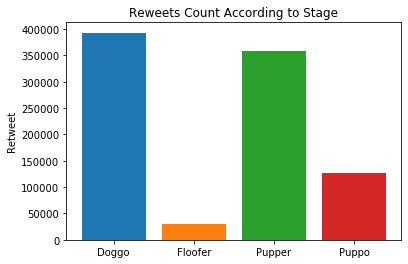

In [217]:
doggo=df[df['dog_stage']=='doggo']['retweet_count'].sum()
floofer=df[df['dog_stage']=='floofer']['retweet_count'].sum()
pupper=df[df['dog_stage']=='pupper']['retweet_count'].sum()
puppo=df[df['dog_stage']=='puppo']['retweet_count'].sum()
locations = [1, 2, 3, 4]
heights = [doggo,floofer,pupper,puppo]
labels = ['Doggo', 'Floofer', 'Pupper', 'Puppo']
plt.bar(locations, heights, tick_label=labels,color=['C0', 'C1', 'C2', 'C3', 'C4'])
plt.title('Reweets Count According to Stage')
plt.ylabel('Retweet');

https://stackoverflow.com/questions/44493417/pandas-dataframe-bar-plot-plot-bars-different-colors-from-specific-colormap

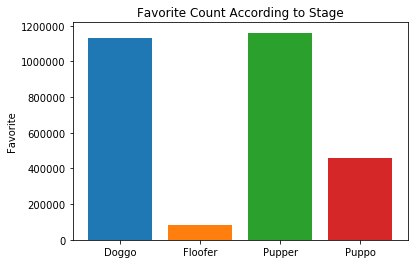

In [220]:
doggo=df[df['dog_stage']=='doggo']['favorite_count'].sum()
floofer=df[df['dog_stage']=='floofer']['favorite_count'].sum()
pupper=df[df['dog_stage']=='pupper']['favorite_count'].sum()
puppo=df[df['dog_stage']=='puppo']['favorite_count'].sum()
locations = [1, 2, 3, 4]
heights = [doggo,floofer,pupper,puppo]
labels = ['Doggo', 'Floofer', 'Pupper', 'Puppo']
plt.bar(locations, heights, tick_label=labels,color=['C0', 'C1', 'C2', 'C3', 'C4'])
plt.title('Favorite Count According to Stage')
plt.ylabel('Favorite');

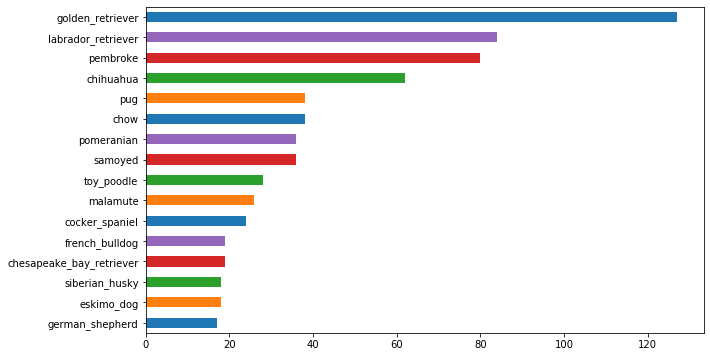

In [219]:
pl=df.query('Dog == True').Prediction.value_counts()[15::-1].plot(kind='barh', color=['C0', 'C1', 'C2', 'C3', 'C4']);
pl.figure.set_size_inches(10, 6)
plt.show()